In [12]:

!unrar x "/content/drive/My Drive/Flipkart_data.rar"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/Flipkart_data.rar

Creating    Flipkart_data                                             OK
Creating    Flipkart_data/Single_prediction                           OK
Extracting  Flipkart_data/Single_prediction/img01.jpeg                     0%  OK 
Extracting  Flipkart_data/Single_prediction/img02.jpeg                     1%  OK 
Extracting  Flipkart_data/Single_prediction/img03.jpeg                     2%  OK 
Extracting  Flipkart_data/Single_prediction/img04.jpeg                     3%  OK 
Creating    Flipkart_data/Testing_set                                 OK
Creating    Flipkart_data/Testing_set/Men_Jeans                       OK
Extracting  Flipkart_data/Testing_set/Men_Jeans/img_10.jpeg                4%  OK 
Extracting  Flipkart_data/Testing_set/Men_Jeans/img_11.jpeg                4%  OK 
Extracting  Flipkart_data/Te

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
cnn_object=Sequential()

In [15]:
cnn_object.add(Conv2D(64,3,3,input_shape=(64,64,3),activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [16]:
cnn_object.add(MaxPool2D(pool_size=(2,2)))

In [17]:
cnn_object.add(Conv2D(32,3,3,activation='relu'))
cnn_object.add(MaxPool2D(pool_size=(2,2)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [18]:
cnn_object.add(Flatten())

In [19]:
cnn_object.add(Dense(units=10,activation='relu'))
cnn_object.add(Dense(units=1,activation='sigmoid'))

In [20]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
callbacks=[EarlyStopping(patience=3,monitor='val_loss',min_delta=0.0001,verbose=1,restore_best_weights=True),ModelCheckpoint('model3.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1),ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)]

In [21]:
from keras.optimizers import Adam,RMSprop,Nadam,SGD

In [22]:
cnn_object.compile(optimizer=Nadam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Flipkart_data/Training_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Flipkart_data/Testing_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
cnn_object.fit(
        train_set,
        steps_per_epoch=100,
        epochs=20,
        validation_data=test_set,
        validation_steps=500,callbacks=callbacks)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 174s 2s/step - loss: 0.3081 - accuracy: 0.8618 - val_loss: 0.2426 - val_accuracy: 0.9000

Epoch 00001: val_loss improved from inf to 0.24262, saving model to model3.h5
Epoch 2/20
100/100 [==============================] - 115s 1s/step - loss: 0.0175 - accuracy: 0.9985 - val_loss: 0.1308 - val_accuracy: 0.9750

Epoch 00002: val_loss improved from 0.24262 to 0.13079, saving model to model3.h5
Epoch 3/20
100/100 [==============================] - 115s 1s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1083 - val_accuracy: 0.9750

Epoch 00003: val_loss improved from 0.13079 to 0.10827, saving model to model3.h5
Epoch 4/20
100/100 [==============================] - 115s 1s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0927 - val_accuracy: 0.9750

Epoch 00004: val_loss improved from 0.10827 to 0.09269, saving model to model3.h5
Epoch 5/20
100/100 

In [24]:
from keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
model=load_model('model3.h5')

In [25]:
import os

In [26]:
print(os.getcwd())

/content


In [27]:

train_set.class_indices

{'Men_Jeans': 0, 'Men_Trouser': 1}

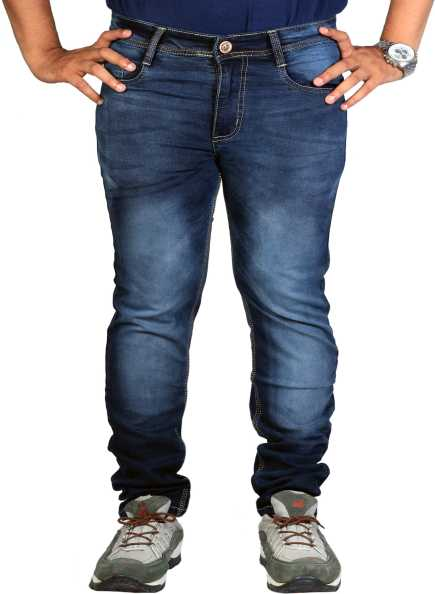


Jeans


In [31]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('/content/Flipkart_data/Single_prediction/img03.jpeg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/Single_prediction/img03.jpeg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

In [33]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
callbacks=[EarlyStopping(patience=3,monitor='val_loss',min_delta=0.0001,verbose=1,restore_best_weights=True),ModelCheckpoint('model4.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1),ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)]

In [34]:
cnn_object.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Flipkart_data/Training_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Flipkart_data/Testing_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
cnn_object.fit(
        train_set,
        steps_per_epoch=100,
        epochs=10,
        validation_data=test_set,
        validation_steps=500,callbacks=callbacks)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 114s 1s/step - loss: 1.7270e-05 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.9750

Epoch 00001: val_loss did not improve from 0.02914
Epoch 2/10
100/100 [==============================] - 114s 1s/step - loss: 1.6668e-05 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.9750

Epoch 00002: val_loss did not improve from 0.02914
Epoch 3/10
100/100 [==============================] - 113s 1s/step - loss: 1.6154e-05 - accuracy: 1.0000 - val_loss: 0.0294 - val_accuracy: 0.9750

Epoch 00003: val_loss did not improve from 0.02914
Epoch 4/10
100/100 [==============================] - 112s 1s/step - loss: 1.5851e-05 - accuracy: 1.0000 - val_loss: 0.0295 - val_accuracy: 0.9750
Restoring model weights from the end of the best epoch

Epoch 00004: val_loss did not improve from 0.02914

Epoch 00004: ReduceLROnPlateau reducing learning rate to 8.00000052

In [38]:
from keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
model=load_model('model4.h5')

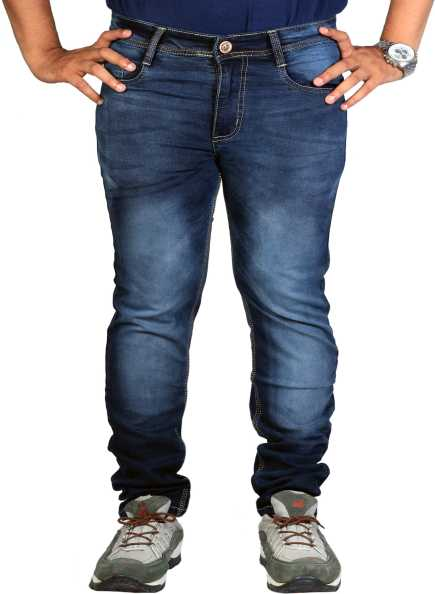


Jeans


In [39]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('/content/Flipkart_data/Single_prediction/img03.jpeg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/Single_prediction/img03.jpeg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

In [40]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
callbacks=[EarlyStopping(patience=3,monitor='val_loss',min_delta=0.0001,verbose=1,restore_best_weights=True),ModelCheckpoint('model5.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1),ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)]

In [41]:
cnn_object.compile(optimizer=SGD(momentum=0.50,learning_rate=0.05),loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Flipkart_data/Training_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Flipkart_data/Testing_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
cnn_object.fit(
        train_set,
        steps_per_epoch=100,
        epochs=10,
        validation_data=test_set,
        validation_steps=500,callbacks=callbacks)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 110s 1s/step - loss: 1.6351e-05 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.9750

Epoch 00001: val_loss improved from inf to 0.02924, saving model to model5.h5
Epoch 2/10
100/100 [==============================] - 111s 1s/step - loss: 1.5982e-05 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 0.9750

Epoch 00002: val_loss did not improve from 0.02924
Epoch 3/10
100/100 [==============================] - 110s 1s/step - loss: 1.5382e-05 - accuracy: 1.0000 - val_loss: 0.0294 - val_accuracy: 0.9750

Epoch 00003: val_loss did not improve from 0.02924
Epoch 4/10
100/100 [==============================] - 111s 1s/step - loss: 1.4583e-05 - accuracy: 1.0000 - val_loss: 0.0294 - val_accuracy: 0.9750
Restoring model weights from the end of the best epoch

Epoch 00004: val_loss did not improve from 0.02924

Epoch 00004: ReduceLROnPlateau reducing 

In [43]:
from keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
model=load_model('model5.h5')

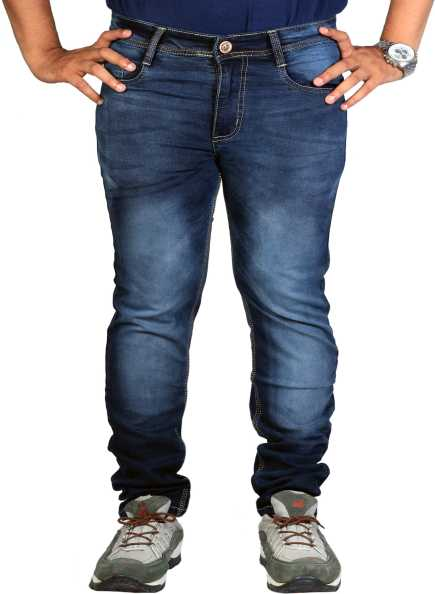


Jeans


In [44]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('/content/Flipkart_data/Single_prediction/img03.jpeg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/Single_prediction/img03.jpeg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')

In [45]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
callbacks=[EarlyStopping(patience=3,monitor='val_loss',min_delta=0.0001,verbose=1,restore_best_weights=True),ModelCheckpoint('model6.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1),ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)]

In [46]:
cnn_object.compile(optimizer=RMSprop(learning_rate=0.05),loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Flipkart_data/Training_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        '/content/drive/My Drive/Flipkart_data/Testing_set',
        target_size=(64, 64),
        batch_size=45,
        class_mode='binary')
cnn_object.fit(
        train_set,
        steps_per_epoch=100,
        epochs=10,
        validation_data=test_set,
        validation_steps=500,callbacks=callbacks)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 113s 1s/step - loss: 47.2073 - accuracy: 0.4913 - val_loss: 0.6933 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.69327, saving model to model6.h5
Epoch 2/10
100/100 [==============================] - 113s 1s/step - loss: 0.6946 - accuracy: 0.4825 - val_loss: 0.6933 - val_accuracy: 0.5000

Epoch 00002: val_loss improved from 0.69327 to 0.69327, saving model to model6.h5
Epoch 3/10
100/100 [==============================] - 112s 1s/step - loss: 0.6949 - accuracy: 0.4728 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00003: val_loss improved from 0.69327 to 0.69316, saving model to model6.h5
Epoch 4/10
100/100 [==============================] - 113s 1s/step - loss: 0.6945 - accuracy: 0.4737 - val_loss: 0.6932 - val_accuracy: 0.5000

Epoch 00004: val_loss did not improve from 0.69316
Epoch 5/10
100/100 [=============================

In [48]:
from keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
model=load_model('model6.h5')

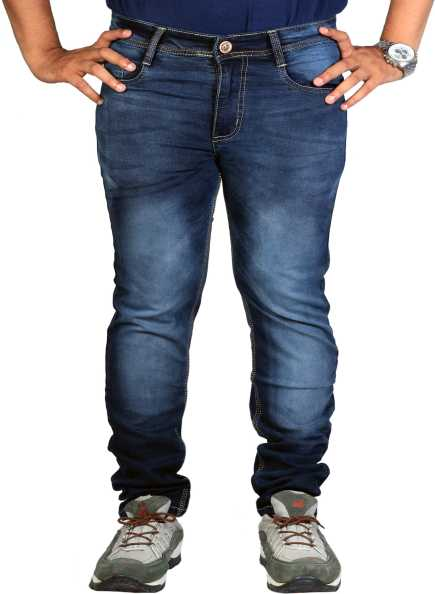


Jeans


In [49]:
import numpy as np
from keras_preprocessing import image
test=image.load_img('/content/Flipkart_data/Single_prediction/img03.jpeg',target_size=(64,64))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=model.predict(test)
path=r'/content/Flipkart_data/Single_prediction/img03.jpeg'
img=cv2.imread(path)
cv2_imshow(img)
cv2.waitKey()
cv2.destroyAllWindows()

if result[0][0]==1:
  print('\nTrouser')
else:
  print('\nJeans')